# 4.10 Coding Etiquette & Excel Reporting 

# Instacart Basket Analysis 

## By Nora Lienenbecker 

#### Table of Contents 

1. Dataset import
2. Addressing PII data
3. Regional segmentation 
4. Identifying and excluding low-activity customers
5. Customer profiling and deriving new columns 
- 5.1 Age brackets
- 5.2 Family status 
- 5.3 Parental status
- 5.4 Income categories 
- 5.5 Department column
- 5.6 Weekday column 
6. Visualizations 
- 6.1 Age distribution 
- 6.2 Family status 
- 6.3 Parental status
- 6.4 Income categories
- 6.5 Busiest hours 
- 6.6 Orders per time period by price range
- 6.7 Product price-range distribution
- 6.8 Customer loyalty distribution
7. Aggregating variables on a customer-profile level 
- 7.1 Income
- 7.2 Age
- 7.3 Family status 
- 7.4 Parental status 
8. Comparing customer profiles with regions and departments 
- 8.1 Loyalty status and department 
- 8.2 Region and department
- 8.3 Parental status 
- 8.4 Income
- 8.5 Age 
- 8.6 Family status 
9. Remaining questions from the project brief 

### 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create a project folder string

path = r'/Users/nora/Desktop/Instacart Basket Analysis'

In [3]:
# Import the data set

df_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_customers.pkl'))

In [4]:
df_merge.shape

(32404859, 37)

### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [5]:
# Check data set

pd.options.display.max_columns = None

df_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,Busiest days,time_period,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_flag,median_days_since_prior_order,frequency_flag,First Name,Surname,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,merge
0,2539329,1,1,2,8,NaN,True,196,1,0,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,6am - 9am,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,6am - 9am,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,10am - 13pm,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,6am - 9am,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,14pm - 17pm,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
# Create list of columns

df_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'Unnamed: 0_y', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest day', 'Busiest days', 'time_period',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spender_flag', 'median_days_since_prior_order', 'frequency_flag',
       'First Name', 'Surname', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'merge'],
      dtype='object')

In [7]:
# Drop unnecessary columns

df_merge = df_merge.drop(['Unnamed: 0_y', '_merge', 'merge'], axis = 1)

In [8]:
df_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,Busiest days,time_period,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_flag,median_days_since_prior_order,frequency_flag,First Name,Surname,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,6am - 9am,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,6am - 9am,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,10am - 13pm,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,6am - 9am,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,14pm - 17pm,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [9]:
# Create a new data frame without PII data 

df_final = df_merge.drop(['First Name', 'Surname'], axis = 1)

In [10]:
# Check new data frame

df_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,Busiest days,time_period,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_flag,median_days_since_prior_order,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,6am - 9am,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,6am - 9am,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,10am - 13pm,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,6am - 9am,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,14pm - 17pm,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [11]:
# Create lists 

region_1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

region_2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

region_3 = ['Delaware','Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

region_4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [12]:
# Write for loop 

result = []

for value in df_final['STATE']:
    if value in region_1:
        result.append('Northeast')
    elif value in region_2:
        result.append('Midwest')
    elif value in region_3:
        result.append('South')
    elif value in region_4:
        result.append('West')
    else:
        result.append('Not in category')

In [13]:
# Create new column 

df_final['Region'] = result

In [14]:
# Check new column 

df_final['Region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [15]:
# Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [16]:
crosstab = pd.crosstab(df_final['Region'], df_final['spender_flag'], dropna = False)

In [17]:
crosstab.to_clipboard()

In [18]:
# I calculated the % of high spenders and low spenders in excel and created a dataframe to show the results

spenders = {'Region': ['Midwest', 'Northeast', 'South', 'West'], '% High Spenders': [2.05, 1.89, 1.94, 1.93], '% Low Spenders': [97.95, 98.11, 98.06, 98.07]}
df_spenders = pd.DataFrame(data=spenders)

In [19]:
df_spenders

,Region,% High Spenders,% Low Spenders
0,Midwest,2.05,97.95
1,Northeast,1.89,98.11
2,South,1.94,98.06
3,West,1.93,98.07


There is no significant difference between regions in terms of spending habits. 

### 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [20]:
# Create low-activity flag 

# Create conditions with loc function

df_final.loc[df_final['max_order'] < 5, 'exclusion_flag'] = 'low activity customer'
df_final.loc[df_final['max_order'] >= 5, 'exclusion_flag'] = 'regular customer'

In [21]:
# Check exclusion flag 

df_final['exclusion_flag'].value_counts(dropna = False)

regular customer         30964564
low activity customer     1440295
Name: exclusion_flag, dtype: int64

In [22]:
# Create a subset with customers to exclude

df_low_activity_customers = df_final[df_final['exclusion_flag'] == 'low activity customer']

In [23]:
# Check whether all values in max_order column are < 5 in this subset 

df_low_activity_customers['max_order'].value_counts()

4    753543
3    686741
2         6
1         5
Name: max_order, dtype: int64

In [24]:
# Export sample 

df_low_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [25]:
# Create a new data frame without low activity customers 

df_final_new = df_final[df_final['exclusion_flag'] == 'regular customer']

In [26]:
# Check whether excluding low activity customers was successful

df_final_new['exclusion_flag'].value_counts() 

regular customer    30964564
Name: exclusion_flag, dtype: int64

In [27]:
df_final_new.shape

(30964564, 34)

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

##### 5.1 Age brackets

In [28]:
# Checking the age range of customers 

df_final_new['Age'].value_counts().sort_index()

18    478457
19    496077
20    480194
21    489116
22    490811
       ...  
77    477999
78    471119
79    508337
80    492750
81    485847
Name: Age, Length: 64, dtype: int64

Defining the age groups 

- 18-20
- 21-30
- 31-40
- 41-50
- 51-60
- 61-70
- 71-80
- 80+

In [29]:
# Write for loop 

age_brackets = []

for value in df_final_new['Age']:
    if value <= 20:
        age_brackets.append('18-20')
    elif (value > 20) and (value <= 30):
        age_brackets.append('21-30')
    elif (value > 30) and (value <= 40):
        age_brackets.append('31-40')
    elif (value > 40) and (value <= 50):
        age_brackets.append('41-50')
    elif (value > 50) and (value <= 60):
        age_brackets.append('51-60')
    elif (value > 60) and (value <= 70):
        age_brackets.append('61-70')
    elif (value > 70) and (value <= 80):
        age_brackets.append('71-80')
    elif (value > 80) and (value <= 90):
        age_brackets.append('80+')    
    else:
        result.append('Not in age category')

In [30]:
df_final_new['age_brackets'] = age_brackets

<ipython-input-30-5113fb947077>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_new['age_brackets'] = age_brackets


In [31]:
# Check age brackets flag 

df_final_new['age_brackets'].value_counts().sort_index()

18-20    1454728
21-30    4849512
31-40    4844193
41-50    4868632
51-60    4834892
61-70    4779958
71-80    4846802
80+       485847
Name: age_brackets, dtype: int64

#### 5.2 Family status 

In [32]:
df_final_new['fam_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

##### 5.3 Parental status 

In [33]:
# Get the frequency of n_dependants column

df_final_new['n_dependants'].value_counts().sort_index()

0    7739681
1    7719106
2    7733261
3    7772516
Name: n_dependants, dtype: int64

In [34]:
# Create conditions with loc function 

df_final_new.loc[df_final['n_dependants'] == 0, 'parental_status'] = 'not parent'
df_final_new.loc[df_final['n_dependants'] >= 1, 'parental_status'] = 'parent'

/Users/nora/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/nora/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/nora/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [35]:
# Check parental_status column 

df_final_new['parental_status'].value_counts(dropna = False)

parent        23224883
not parent     7739681
Name: parental_status, dtype: int64

#### 5.4 Income categories

In [36]:
# Check income range 

df_final_new['income'].value_counts().sort_index()

25903      20
25911      28
25937      39
25941      31
25955     392
         ... 
584097    826
590790     54
591089    176
592409    318
593901    640
Name: income, Length: 96069, dtype: int64

<AxesSubplot:ylabel='Frequency'>

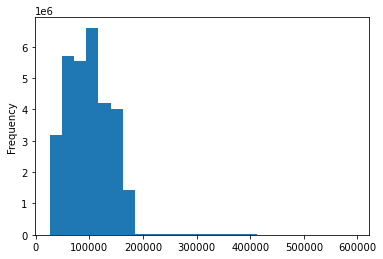

In [37]:
# Create a histogram to find income categories

df_final_new['income'].plot.hist(bins = 25)

Defining the income brackets: 

range: 20.000 - 600.000

- 25.000-50.000
- 50.000-75.000
- 75.000-100.000
- 100.000-125.000
- 125.000-150.000
- 150.000+

In [38]:
income = []

for value in df_final_new['income']:
    if value <= 50000: 
        income.append('025000-050000')
    elif (value > 50000) and (value <= 75000):
        income.append('050000-075000')
    elif (value > 75000) and (value <= 100000):
        income.append('075000-100000')
    elif (value > 100000) and (value <= 125000):
        income.append('100000-125000')
    elif (value > 125000) and (value <= 150000):
        income.append('125000-150000')
    elif (value > 150000):
        income.append('150000+')
    else: 
        income.append('something went wrong')

In [39]:
df_final_new['income_categories'] = income

<ipython-input-39-f1dc2cd237c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_new['income_categories'] = income


In [40]:
# Check income_categories variable

df_final_new['income_categories'].value_counts().sort_index()

025000-050000    3362554
050000-075000    6544180
075000-100000    6850802
100000-125000    5928984
125000-150000    4383510
150000+          3894534
Name: income_categories, dtype: int64

#### 5.5 Department column 

In [41]:
# Import department data 

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [42]:
df_dep.head()

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [43]:
# Transpose the table

# Check departments to see which profiling variables I can create 

df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [44]:
# Creating new column for department names 


df_final_new.loc[df_final_new['department_id'] == 1, 'department'] = 'frozen'
df_final_new.loc[df_final_new['department_id'] == 2, 'department'] = 'other'
df_final_new.loc[df_final_new['department_id'] == 3, 'department'] = 'bakery'
df_final_new.loc[df_final_new['department_id'] == 4, 'department'] = 'produce'
df_final_new.loc[df_final_new['department_id'] == 5, 'department'] = 'alcohol'
df_final_new.loc[df_final_new['department_id'] == 6, 'department'] = 'international'
df_final_new.loc[df_final_new['department_id'] == 7, 'department'] = 'beverages'
df_final_new.loc[df_final_new['department_id'] == 8, 'department'] = 'pets'
df_final_new.loc[df_final_new['department_id'] == 9, 'department'] = 'dry goods pasta'
df_final_new.loc[df_final_new['department_id'] == 10, 'department'] = 'bulk'
df_final_new.loc[df_final_new['department_id'] == 11, 'department'] = 'personal care'
df_final_new.loc[df_final_new['department_id'] == 12, 'department'] = 'meat seafood'
df_final_new.loc[df_final_new['department_id'] == 13, 'department'] = 'pantry'
df_final_new.loc[df_final_new['department_id'] == 14, 'department'] = 'breakfast'
df_final_new.loc[df_final_new['department_id'] == 15, 'department'] = 'canned goods'
df_final_new.loc[df_final_new['department_id'] == 16, 'department'] = 'dairy eggs'
df_final_new.loc[df_final_new['department_id'] == 17, 'department'] = 'households'
df_final_new.loc[df_final_new['department_id'] == 18, 'department'] = 'babies'
df_final_new.loc[df_final_new['department_id'] == 19, 'department'] = 'snacks'
df_final_new.loc[df_final_new['department_id'] == 20, 'department'] = 'deli'
df_final_new.loc[df_final_new['department_id'] == 21, 'department'] = 'missing'

/Users/nora/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/nora/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/nora/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

/Users/nora/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/nora/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [45]:
# Checking the department column 

df_final_new['department'].value_counts()

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
households          699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

#### 5.6 Weekday column 

In [46]:
# Creating weekday column with loc function 

df_final_new.loc[df_final_new['orders_day_of_week'] == 0, 'weekday'] = 'Saturday'
df_final_new.loc[df_final_new['orders_day_of_week'] == 1, 'weekday'] = 'Sunday'
df_final_new.loc[df_final_new['orders_day_of_week'] == 2, 'weekday'] = 'Monday'
df_final_new.loc[df_final_new['orders_day_of_week'] == 3, 'weekday'] = 'Tuesday'
df_final_new.loc[df_final_new['orders_day_of_week'] == 4, 'weekday'] = 'Wednesday'
df_final_new.loc[df_final_new['orders_day_of_week'] == 5, 'weekday'] = 'Thursday'
df_final_new.loc[df_final_new['orders_day_of_week'] == 6, 'weekday'] = 'Friday'

/Users/nora/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/nora/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/nora/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [47]:
# Checking weekday column 

df_final_new['weekday'].value_counts()

Saturday     5908610
Sunday       5411686
Friday       4291304
Thursday     4033729
Monday       4024706
Tuesday      3669535
Wednesday    3624994
Name: weekday, dtype: int64

In [48]:
# Comparing orders_day_of_week with weekday column 

df_final_new['orders_day_of_week'].value_counts()

0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: orders_day_of_week, dtype: int64

### 6. Create an appropriate visualization to show the distribution of profiles.

#### 6.1 Age Distribution 

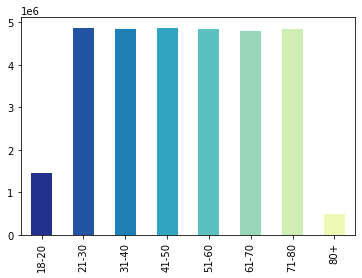

In [49]:
# Create a bar chart

bar_age_brackets = df_final_new['age_brackets'].value_counts().sort_index().plot.bar(color = sns.color_palette('YlGnBu_r', 8))

In [50]:
# Export figure 

bar_age_brackets.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_brackets.png'))

#### 6.2 Family Status 

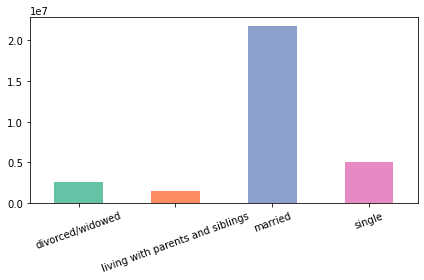

In [51]:
# Create bar chart of total orders by family status 

bar_family_status = df_final_new['fam_status'].value_counts().sort_index().plot.bar(color = sns.color_palette('Set2', 4))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

Text(108.68, 0.5, '')

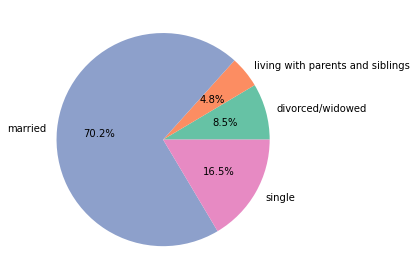

In [52]:
# Create pie chart to show distribution of customers in terms of family status 

pie_family_status = df_final_new['fam_status'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Set2', 4))
plt.tight_layout()
plt.ylabel('')

In [53]:
# Export figures 

bar_family_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_status.png'))

In [54]:
pie_family_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_family_status.png'))

#### 6.3 Parental Status

(array([0, 1]), [Text(0, 0, 'parent'), Text(1, 0, 'not parent')])

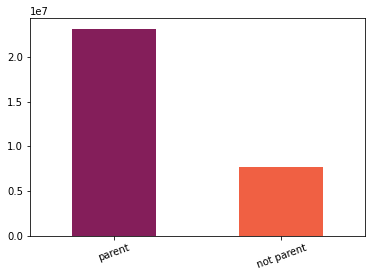

In [55]:
# Create bar chart of total orders by parental status 

bar_parental_status = df_final_new['parental_status'].value_counts().plot.bar(color = sns.color_palette('rocket',2))
plt.xticks(rotation= 20, horizontalalignment="center")

Text(0, 0.5, '')

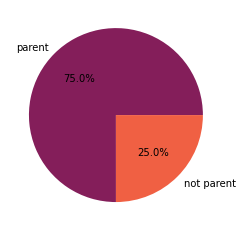

In [56]:
# Create pie chart of distribution of customers in terms of parental status 

pie_parental_status = df_final_new['parental_status'].value_counts().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('rocket',2))
plt.ylabel('')

In [57]:
# Export figures 

bar_parental_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parental_status.png'))

In [58]:
pie_parental_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_parental_status.png'))

#### 6.4 Income Categories

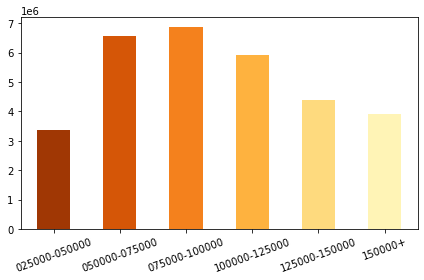

In [59]:
# Create bar chart of total orders across income categories 

bar_income_category = df_final_new['income_categories'].value_counts().sort_index().plot.bar(color = sns.color_palette('YlOrBr_r', 6))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [60]:
# Export figure 

bar_income_category.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_category.png'))

#### 6.5 Busiest hours 

Text(0.5, 0, 'hour of the day')

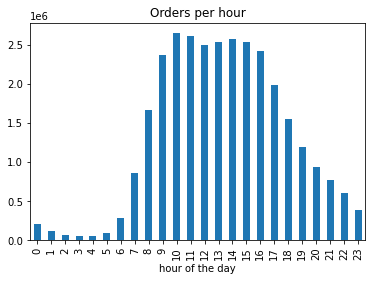

In [61]:
# What are the busiest hours of the day? 

bar_busiest_hour = df_final_new['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.title('Orders per hour')
plt.xlabel('hour of the day')

In [62]:
# Export bar chart

bar_busiest_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_busiest_hour.png'))

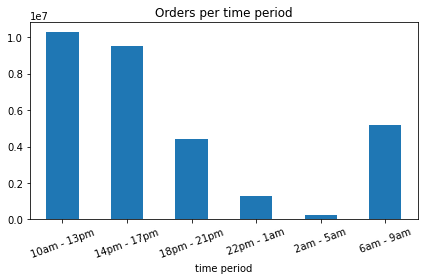

In [63]:
# What are the busiest hours of the day? 

bar_busiest_time = df_final_new['time_period'].value_counts().sort_index().plot.bar()
plt.xlabel('time period')
plt.title('Orders per time period')
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [64]:
# Export bar chart

bar_busiest_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_busiest_time.png'))

#### 6.6 Orders per time-period by price range

In [65]:
# Are there particular times of the day when people spend the most money? 
# Create crosstab

crosstab_time_product_price = pd.crosstab(df_final_new['income_categories'], df_final_new['price_range_loc'], dropna = False)

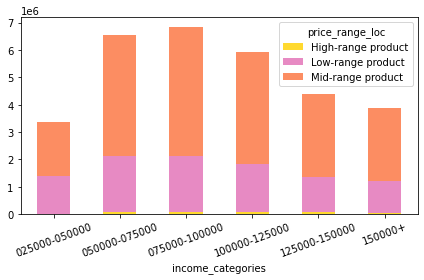

In [66]:
# Stacked bar chart: orders per time period by price range 

bar_time_product_price = crosstab_time_product_price.plot(kind = 'bar', stacked = True, color = sns.color_palette('Set2_r', 3))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

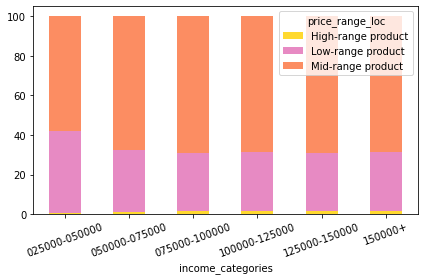

In [67]:
# 100% stacked bar chart: orders per time period by price range in percent 

bar_time_product_price_100 = crosstab_time_product_price.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Set2_r', 3))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

#### 6.7 Product price-range distribution

Text(0, 0.5, '')

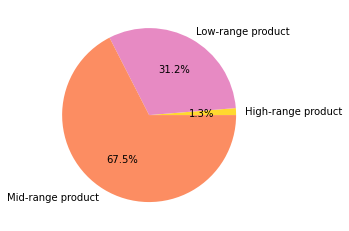

In [68]:
# Marketing and sales want to use simpler price range groupings.

pie_time_product_price = df_final_new['price_range_loc'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Set2_r', 3))
plt.ylabel('')

In [69]:
# Export visualizations

bar_time_product_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_time_product_price.png'))
bar_time_product_price_100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_time_product_price_100.png'))
pie_time_product_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_time_product_price.png'))

#### 6.8 Customer brand loyalty distribution 

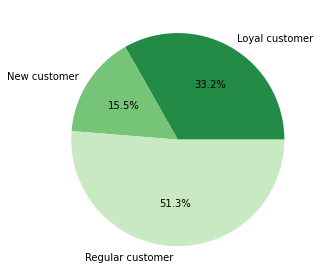

In [70]:
# Distribution among customers in regards to brand loyalty 

loyalty_pie = df_final_new['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Greens_r',3))
plt.ylabel('')
plt.tight_layout()

In [71]:
# Export pie chart 

loyalty_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_pie.png'))

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

#### 7.1 Income 

In [72]:
# Expenditure by income income categories 

expenditure_income = df_final_new.groupby('income_categories').agg({'prices': ['mean', 'min', 'max']})

In [73]:
expenditure_income

prices              
                        mean  min      max
income_categories                         
025000-050000       6.707347  1.0     25.0
050000-075000       7.833402  1.0  14900.0
075000-100000       9.024778  1.0  99999.0
100000-125000       9.854741  1.0  99999.0
125000-150000      11.042222  1.0  99999.0
150000+            32.620080  1.0  99999.0

In [74]:
expenditure_income.to_clipboard()

In [75]:
# Usage frequency by income categories 

usage_frequency_income = df_final_new.groupby('income_categories').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [76]:
usage_frequency_income

days_since_prior_order           
                                    mean  min   max
income_categories                                  
025000-050000                  11.175808  0.0  30.0
050000-075000                  10.760574  0.0  30.0
075000-100000                  10.763576  0.0  30.0
100000-125000                  10.789978  0.0  30.0
125000-150000                  10.818127  0.0  30.0
150000+                        10.684293  0.0  30.0

In [77]:
usage_frequency_income.to_clipboard()

#### 7.2 Age 

In [78]:
# Expenditure by age categories

expenditure_age = df_final_new.groupby('age_brackets').agg({'prices': ['mean', 'min', 'max']})

In [79]:
expenditure_age

prices              
                   mean  min      max
age_brackets                         
18-20         10.509134  1.0  99999.0
21-30         12.554780  1.0  99999.0
31-40         12.083512  1.0  99999.0
41-50         11.919679  1.0  99999.0
51-60         11.869024  1.0  99999.0
61-70         11.844252  1.0  99999.0
71-80         11.971842  1.0  99999.0
80+            9.778333  1.0  99999.0

In [80]:
expenditure_age.to_clipboard()

In [81]:
# Usage frequency by age categories 

usage_frequency_age = df_final_new.groupby('age_brackets').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [82]:
usage_frequency_age

days_since_prior_order           
                               mean  min   max
age_brackets                                  
18-20                     10.879634  0.0  30.0
21-30                     10.826524  0.0  30.0
31-40                     10.779940  0.0  30.0
41-50                     10.797317  0.0  30.0
51-60                     10.855219  0.0  30.0
61-70                     10.776992  0.0  30.0
71-80                     10.801834  0.0  30.0
80+                       10.839041  0.0  30.0

In [83]:
usage_frequency_age.to_clipboard()

#### 7.3 Family Status

In [84]:
# Expenditure by family status 

expenditure_fam_status = df_final_new.groupby('fam_status').agg({'prices': ['mean', 'min', 'max']})

In [85]:
expenditure_fam_status

prices              
                                       mean  min      max
fam_status                                               
divorced/widowed                  11.532741  1.0  99999.0
living with parents and siblings  10.890167  1.0  99999.0
married                           11.944390  1.0  99999.0
single                            12.398586  1.0  99999.0

In [86]:
expenditure_fam_status.to_clipboard()

In [87]:
# Usage frequency by family status 

usage_frequency_fam_status = df_final_new.groupby('fam_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [88]:
usage_frequency_fam_status

days_since_prior_order           
                                                   mean  min   max
fam_status                                                        
divorced/widowed                              10.750328  0.0  30.0
living with parents and siblings              10.750995  0.0  30.0
married                                       10.820875  0.0  30.0
single                                        10.813571  0.0  30.0

In [89]:
usage_frequency_fam_status.to_clipboard()

#### 7.4 Parental Status

In [90]:
# Expenditure by parental status 

expenditure_parental_status = df_final_new.groupby('parental_status').agg({'prices': ['mean', 'min', 'max']})

In [91]:
expenditure_parental_status

prices              
                      mean  min      max
parental_status                         
not parent       12.102657  1.0  99999.0
parent           11.877157  1.0  99999.0

In [92]:
expenditure_parental_status.to_clipboard()

In [93]:
# Usage frequency by parental status

usage_frequency_parental_status = df_final_new.groupby('parental_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [94]:
usage_frequency_parental_status

days_since_prior_order           
                                  mean  min   max
parental_status                                  
not parent                   10.791951  0.0  30.0
parent                       10.816416  0.0  30.0

In [95]:
usage_frequency_parental_status.to_clipboard()

### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

#### 8.1 Loyalty Status and Department

In [96]:
# Are there differences in ordering habits based on a customer's loyalty status?

crosstab_loyalty_status_dept = pd.crosstab(df_final_new['department'], df_final_new['loyalty_flag'], dropna = False)

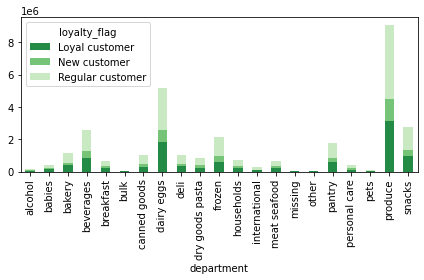

In [97]:
# Stacked bar chart 

bar_loyalty_status_dept = crosstab_loyalty_status_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens_r',3))
plt.tight_layout()

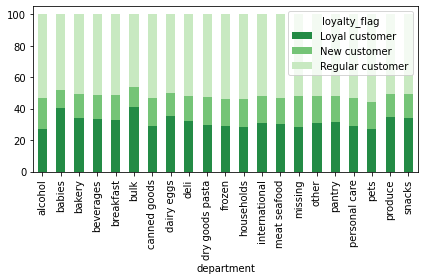

In [98]:
# 100 % Stacked Bar Chart

bar_loyalty_status_dept_100 = crosstab_loyalty_status_dept.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens_r',3))
plt.tight_layout()

In [99]:
# Export bar charts 

bar_loyalty_status_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_status_dept.png'))

In [100]:
bar_loyalty_status_dept_100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_status_dept_100.png'))

#### 8.2 Region and Department

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

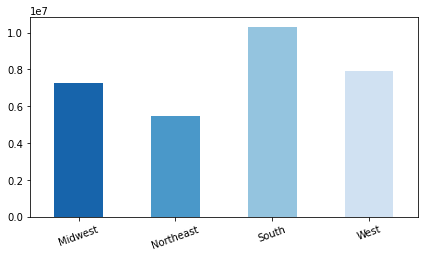

In [101]:
# Creating a bar chart for region column
# How are customers distributed across regions? 

region_bar = df_final_new['Region'].value_counts().sort_index().plot.bar(color = sns.color_palette('Blues_r', 4))
plt.tight_layout()
plt.xticks(rotation= 20, horizontalalignment="center")

In [102]:
# Export bar chart 

region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_bar.png'))

In [103]:
# Are there differences in ordering habits based on a customer’s region? 

crosstab_region_department = pd.crosstab(df_final_new['department'], df_final_new['Region'], dropna = False)

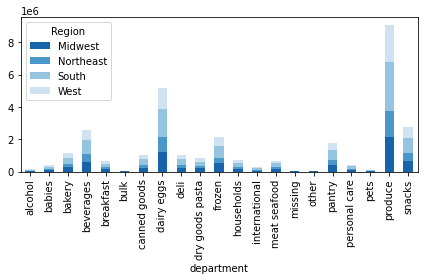

In [104]:
# Stacked bar chart 

bar_region_department = crosstab_region_department.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues_r', 4))
plt.tight_layout()

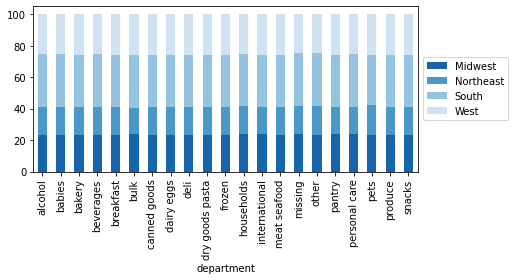

In [105]:
# 100% stacked bar chart 

bar_region_department_100 = crosstab_region_department.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues_r', 4))
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [106]:
# Export bar charts

bar_region_department_100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_department_100.png'))

In [107]:
bar_region_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_department.png'))

#### 8.3 Parental Status 

##### Parental Status and Region

In [108]:
# Crosstab for parental_status and region

crosstab_parental_status_region = pd.crosstab(df_final_new['parental_status'], df_final_new['Region'], dropna = False)

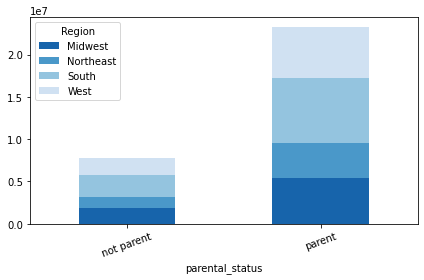

In [109]:
# Stacked bar chart 

bar_parental_status_region = crosstab_parental_status_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues_r', 4))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

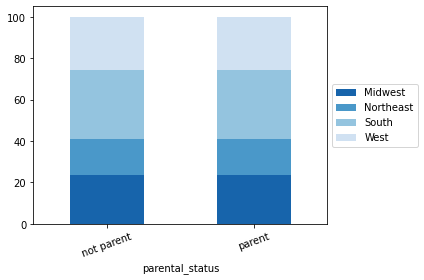

In [110]:
# 100 % Stacked Bar Chart

bar_parental_status_region_100 = crosstab_parental_status_region.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues_r', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

There is no difference in the number of parents / childless customers between states. 

In [111]:
# Export bar charts

bar_parental_status_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parental_status_region.png'))

In [112]:
bar_parental_status_region_100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parental_status_region_100.png'))

##### Parental Status and Department 

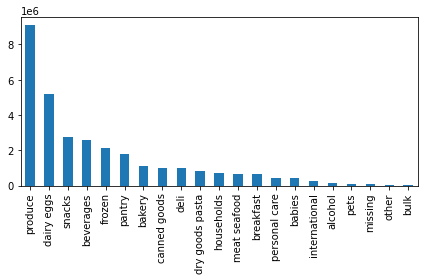

In [113]:
# Creating a bar chart of orders per department 

bar_dept = df_final_new['department'].value_counts().plot.bar()
plt.tight_layout()

In [114]:
# Export figure 

bar_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept.png'))

In [115]:
# Crosstab for parental_status and department

crosstab_parental_status_dept = pd.crosstab(df_final_new['department'], df_final_new['parental_status'], dropna = False)

Most orders are from departments 4 and 16 e.g., the produce department and the dairy/eggs department. Most customers are parents. 

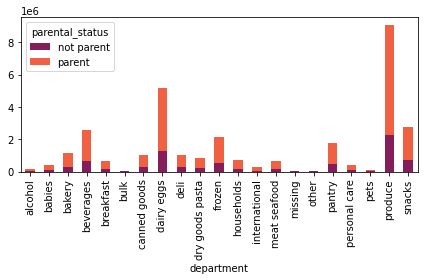

In [116]:
# Stacked bar chart 

bar_parental_status_dept = crosstab_parental_status_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('rocket',2))
plt.tight_layout()

In [117]:
# Export bar chart 

bar_parental_status_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parental_status_dept.png'))

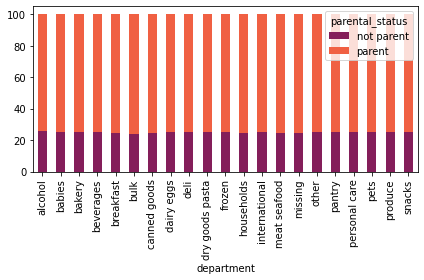

In [118]:
# 100% stacked bar chart 

bar_parental_status_dept_100 = crosstab_parental_status_dept.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('rocket',2))
plt.tight_layout()

There is no difference between the ordering habits of parents vs. non-parents.

In [119]:
# Export bar chart 

bar_parental_status_dept_100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parental_status_dept_100.png'))

#### 8.4 Income 

##### Income and Region

In [120]:
# Crosstab for income_categories and region

crosstab_income_region = pd.crosstab(df_final_new['income_categories'], df_final_new['Region'], dropna = False)

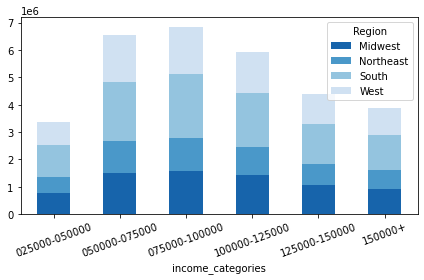

In [121]:
# Stacked bar chart 

bar_crosstab_income_region = crosstab_income_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues_r', 4))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

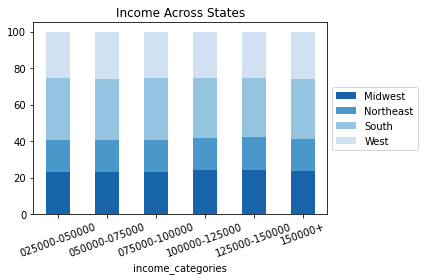

In [122]:
# 100% stacked bar chart 

bar_crosstab_income_region_100 = crosstab_income_region.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues_r', 4))
plt.title('Income Across States')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [123]:
# Export bar charts

bar_crosstab_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_crosstab_income_region.png'))

In [124]:
bar_crosstab_income_region_100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_crosstab_income_region_100.png'))

##### Income and Department

In [125]:
# Crosstab for income and department 

crosstab_income_dept = pd.crosstab(df_final_new['department'], df_final_new['income_categories'], dropna = False)

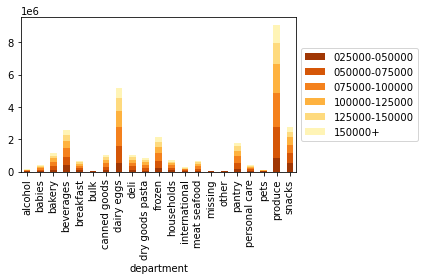

In [126]:
# Stacked bar chart 

bar_crosstab_income_dept = crosstab_income_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('YlOrBr_r', 6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

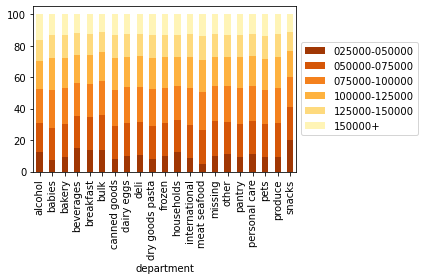

In [127]:
# 100% stacked bar chart 

bar_crosstab_income_dept_100 = crosstab_income_dept.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlOrBr_r', 6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [128]:
# Export bar charts

bar_crosstab_income_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_crosstab_income_dept.png'))

In [129]:
bar_crosstab_income_dept_100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_crosstab_income_dept_100.png'))

#### 8.5 Age

##### Age and Region

In [130]:
crosstab_age_region = pd.crosstab(df_final_new['age_brackets'], df_final_new['Region'], dropna = False)

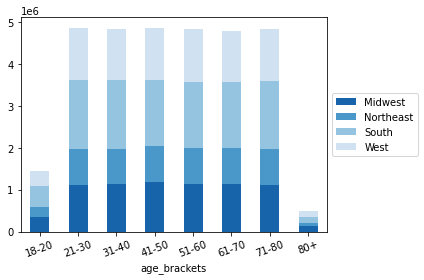

In [131]:
# Stacked bar chart 

bar_crosstab_age_region = crosstab_age_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues_r', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

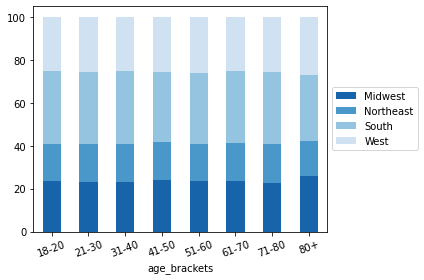

In [132]:
# 100% stacked bar chart 

bar_crosstab_age_region_100 = crosstab_age_region.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues_r', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

There is no difference in the distribution of age groups accross states! 

In [133]:
# Export bar charts 

bar_crosstab_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_crosstab_age_region.png'))

In [134]:
bar_crosstab_age_region_100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_crosstab_age_region_100.png'))

##### Age and Department 

In [135]:
# Crosstab for age and department 

crosstab_age_department = pd.crosstab(df_final_new['department'], df_final_new['age_brackets'], dropna = False)

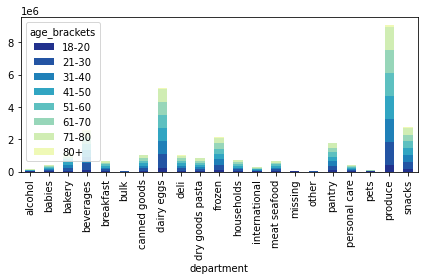

In [136]:
# Stacked bar chart 

bar_crosstab_age_department = crosstab_age_department.plot(kind = 'bar', stacked = True, color = sns.color_palette('YlGnBu_r', 8))
plt.tight_layout()

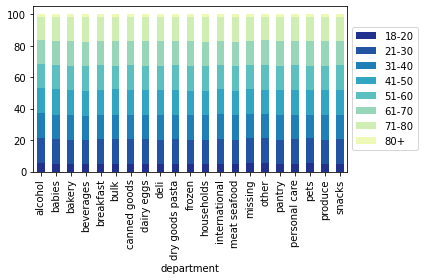

In [137]:
# 100% stacked bar chart 

bar_crosstab_age_department_100 = crosstab_age_department.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlGnBu_r',8))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [138]:
# Export bar charts 

bar_crosstab_age_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_crosstab_age_department.png'))

In [139]:
# Export bar charts 

bar_crosstab_age_department_100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_crosstab_age_department_100.png'))

#### 8.6 Family Status 

##### Family Status and Region

In [140]:
# Crosstab for family status and region 

crosstab_familystatus_region = pd.crosstab(df_final_new['fam_status'], df_final_new['Region'], dropna = False)

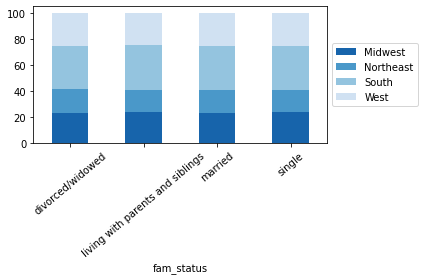

In [141]:
# 100% stacked bar chart: distribution of family status across regions 

bar_crosstab_familystatus_region_100 = crosstab_familystatus_region.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues_r', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 40, horizontalalignment="center")
plt.tight_layout()

There is no difference between the distribution of people who single/married/divorced/living with parents between states. 

##### Family Status and Department 

In [142]:
# Crosstab for family status and department 

crosstab_famstat_department = pd.crosstab(df_final_new['department'], df_final_new['fam_status'], dropna = False)

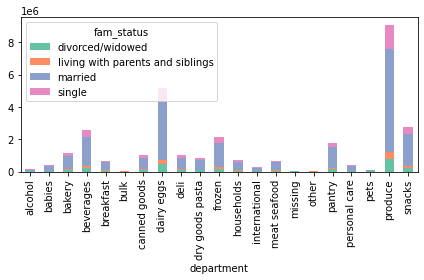

In [143]:
# Stacked bar chart

bar_crosstab_famstat_department = crosstab_famstat_department.sort_index().plot(kind = 'bar', stacked = True, color = sns.color_palette('Set2', 4))
plt.tight_layout()

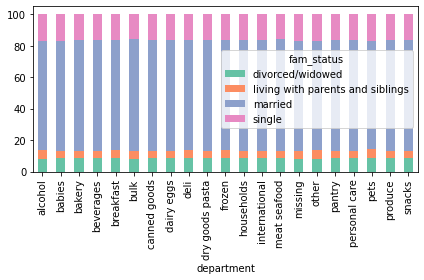

In [144]:
# 100% stacked bar chart

bar_crosstab_famstat_department_100 = crosstab_famstat_department.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Set2', 4))
plt.tight_layout()

In [145]:
# Export bar charts 

bar_crosstab_famstat_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_crosstab_famstat_department.png'))

In [146]:
bar_crosstab_famstat_department_100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_crosstab_famstat_department_100.png'))

### 9. Answering Remaining Questions from the Project Brief

#### Key Question 2: Are there particular times when people spend the most money? 

In [147]:
# Calculate the mean price per hour

prices_hour = df_final_new.groupby('order_hour_of_day').agg({'prices': ['mean']})

In [148]:
prices_hour

,prices
,mean
order_hour_of_day,
0,10.491177
1,9.980347
2,14.863998
3,13.236278
4,12.452253
5,12.846391
6,11.915574
7,12.279888


Text(0, 0.5, 'mean_price')

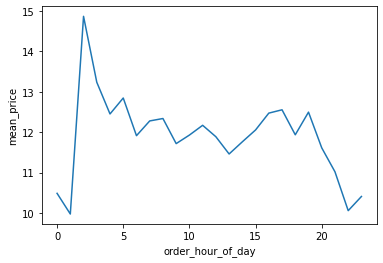

In [149]:
# Create a line chart of mean prices per hour of the day 

mean_price_line_chart = prices_hour.plot.line(legend = False)
plt.ylabel('mean_price')

In [150]:
# Export line chart

mean_price_line_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'mean_price_line_chart.png'))

In [ ]:
# Export final data set 

df_final_new.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))